## Moroccan IT PFE 2020 Analysis

This work was done by Kaygi22 <br/>
Data was gathered by: GI3 ENSA Al Hoceima <br/>
Feel free to share, copy, and modify the source code. 

In [1]:
import pandas as pd
import csv
import os
import re   
import nltk
from nltk.corpus import stopwords

#If you don't have stopwords and punkt from nltk, run these commands from the console or from jupyter
"""nltk.download('stopwords')
nltk.download('punkt')"""

"nltk.download('stopwords')\nnltk.download('punkt')"

In [6]:
#Loading data
it_data = pd.read_csv("data/QueryResults.csv")
#We drop the column count, because we won't use it 
it_data = it_data.drop('Count', 1)
#To imprive the efficiency of the result, we only chose the first 2000 frequent technolgy in stackoverflow
#Because some normal words can be considered as technologies like focus, la, this etc. 
it_data = it_data.head(2500)
#Because the majority of the offers are written in french words, we picked french stop words to eliminate 
#during our NLP treatment 
stopWords_fr = set(stopwords.words('french'))

In [7]:
#Check if a word is a technology
def check_word_technology(tech):
    word = get_cleaned_hashtags(tech)
    tech = tech.lower()
    if tech in it_data['TagName'].values:
        return True
    else:
        return False

#get the name of the company
#the only way to extract the name of the company, is from email contact
def extract_company_name(email):
    email = email.split('@')
    company_website = email[1].split('.')
    return company_website[0]

#get the list of all included emails in the offer
def get_emails_list(text):
    return re.findall('\S+@\S+', text) 

#clean all hashtags
#Some texts contain technologies as hashtags
def get_cleaned_hashtags(text):
    hashtags = re.findall('#\S+', text)
    cleaned = []
    for hashtag in hashtags:
        curr = hashtag[1:]
        cleaned.append(curr)
    return cleaned

def contains_word(s, w):
    return f' {w} ' in f' {s} '

## Exploring the files

In [9]:
files = []
path = "offers"
#Creating a list of files
for r, d, f in os.walk(path):
    for file in f:
            files.append(os.path.join(r, file))
len(files)

110

In [10]:
tech_comp = pd.DataFrame(columns=['Technology','Company'])

for file in files:
    f = open(file, "r", encoding="latin-1")
    annonce = f.read()
    
    #Extracting company names
    
    emails = get_emails_list(annonce)
    email_list = set()
    for email in emails:
        email_list.add(extract_company_name(email))
    
    
    if len(email_list) == 0:
        email = "Unknown"
    else:
        email_list = sorted(email_list)
        email = email_list[0]
        
        
    #Extracting Technologies - Removing punctuation - Removing French stopwrds considered as technologies
    
    annonce = annonce.lower()
    tokens = nltk.word_tokenize(annonce)
    annonce = re.sub(r'[^\w\s]','',annonce)
    technologies = set()        
    for word in it_data['TagName'].values:
        if word not in stopWords_fr and contains_word(annonce, word):
            technologies.add(word)
            
    for techno in technologies:
        #print(email, techno)
        tech_comp = tech_comp.append({'Technology': techno,'Company':email}, ignore_index=True)



In [54]:
"""
Why do we need to extract company emails? 
The only way to extract a company name is from its emmail. It's true, that won't be always helpful, but for now,
especially we don't have a dictionary for company names where we can refer to, our only source is their contact email
that's why, and while gathering the data, I had to add a fake contact email like: contact@company.com, so I can
process the company name in my algorithms
"""
company_emails = []
for file in files:
    f = open(file, "r", encoding="latin-1")
    annonce = f.read()
    emails = get_emails_list(annonce)
    email_list = set()
    for email in emails:
        email_list.add(extract_company_name(email))
    sorted(email_list)
    company_emails.append(email_list)
    
for lst in company_emails:
    sorted(lst)
    if len(lst) == 2:
        lst = sorted(lst)
        #print(lst[0])

## Plotting results

In [59]:
sr = tech_comp['Technology'].value_counts()
tech_occurences = sr.to_frame()
keys = []
values = []
for index, row in tech_occurences.iterrows():
    print(row['Technology'])
    keys.append(index)
    values.append(row['Technology'])
#We create our dictionary for ploting word cloud    
dic = dict(zip(keys, values))

22
21
14
12
12
11
11
10
9
8
8
8
7
7
7
7
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


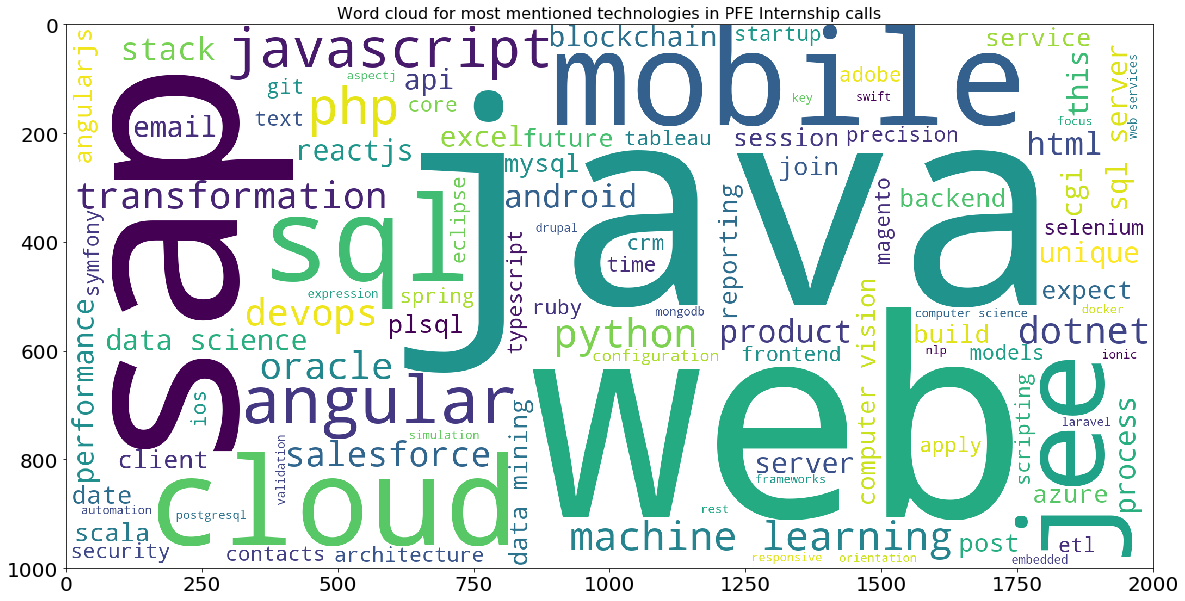

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

wc = WordCloud(background_color="white",
               width=2000,
               height=1000, 
               max_words=100,
               relative_scaling=0.5,
               normalize_plurals=False,
              ).generate_from_frequencies(dic)
#wc.random_color_func()
plt.figure( figsize=(20,10) )
plt.title("Word cloud for most mentioned technologies in PFE Internship calls", fontsize="16")
plt.imshow(wc)

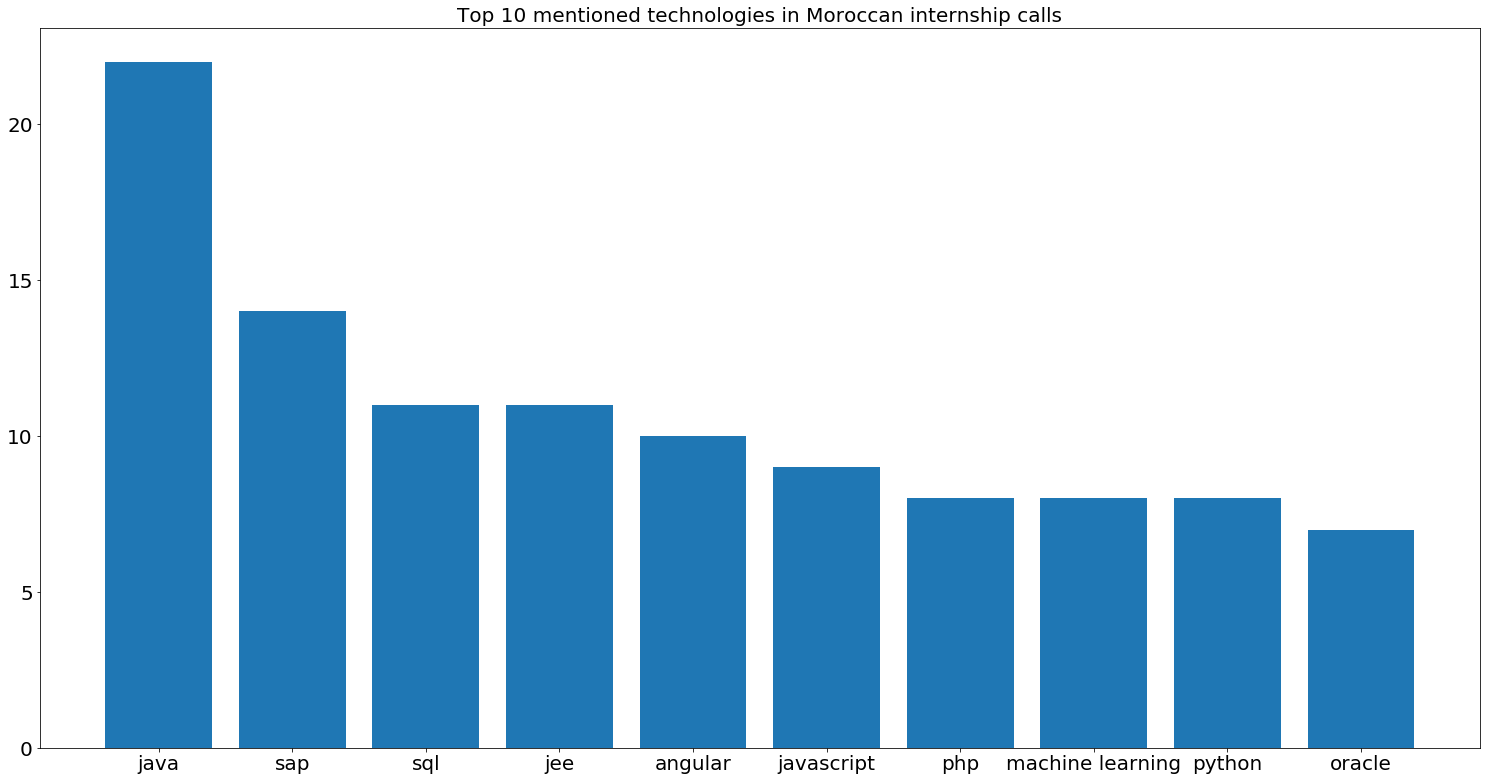

In [66]:
ignore = ['web','mobile','cloud', 'transformation', 'product', 'unique', 'email', 'performance', 'this']
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
p_techs = []
p_occurences = []


limit = 10
counter = 0
for key, value in dic.items():
    #print(key, value)
    if key not in ignore:
        #print(key)
        p_techs.append(key)
        #print(dic[key])
        p_occurences.append(dic[key])
        counter = counter+1
    if counter == limit:
        break    

ax.bar(p_techs,p_occurences)
plt.title("Top 10 mentioned technologies in Moroccan internship calls", fontsize="20")
plt.show()

In [ ]:
res = 0
for val in tech_occurences['Technology']:
    res = res + val
res

## FrontEnd

In [56]:
res_react = tech_comp[tech_comp['Technology'] == "reactjs"].count()[0]
res_angular = tech_comp[tech_comp['Technology'] == "angular"].count()[0] + tech_comp[tech_comp['Technology'] == "angularjs"].count()[0]
res_js = tech_comp[tech_comp['Technology'] == "javascript"].count()[0]

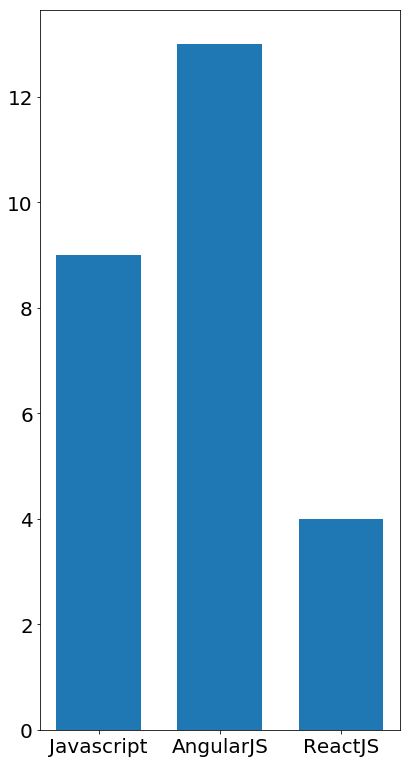

In [57]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(5, 10))
ax = fig.add_axes([0,0,1,1])

#technolog = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
ax.bar(['Javascript', 'AngularJS', 'ReactJS'],[res_js, res_angular, res_react], width=0.7)
plt.show()

## Data fields

In [45]:
ml = tech_comp[tech_comp['Technology'] == "machine learning"].count()[0]
ds = tech_comp[tech_comp['Technology'] == "data science"].count()[0]
blockchain = tech_comp[tech_comp['Technology'] == "blockchain"].count()[0]
python = tech_comp[tech_comp['Technology'] == "python"].count()[0]
r = tech_comp[tech_comp['Technology'] == "r"].count()[0]
tableau = tech_comp[tech_comp['Technology'] == "tableau"].count()[0]
powerbi = tech_comp[tech_comp['Technology'] == "powerbi"].count()[0]
hadoop = tech_comp[tech_comp['Technology'] == "hadoop"].count()[0]
sql = tech_comp[tech_comp['Technology'] == "sql"].count()[0]

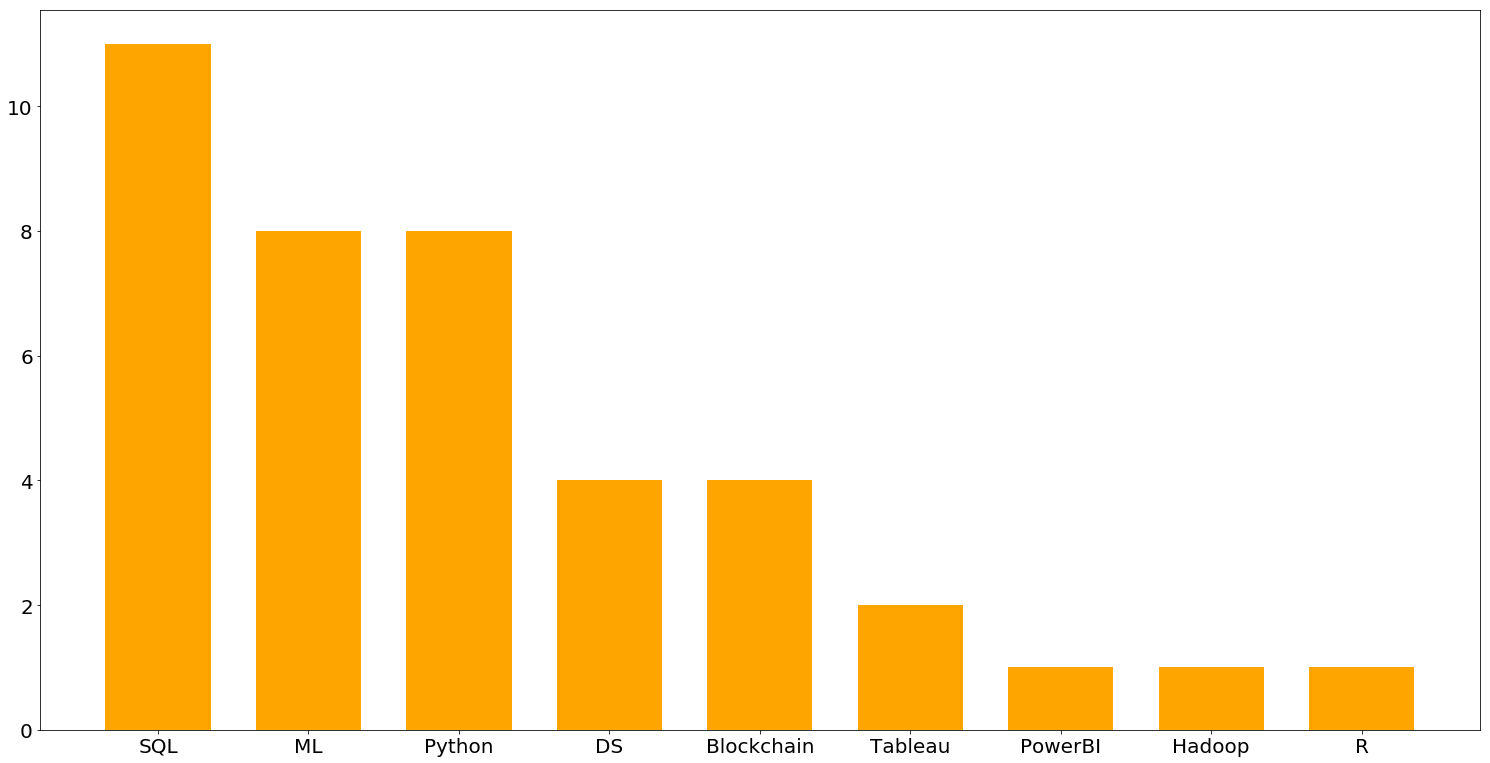

(None,)

In [58]:
plt.rcParams.update({'font.size': 20})


fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])


ax.bar(['SQL','ML', 'Python', 'DS', 'Blockchain', 'Tableau', 'PowerBI', 'Hadoop', 'R'],
       [sql, ml, python, ds, blockchain, tableau, powerbi, hadoop, r], 
       width=0.7,
      color="orange")
plt.show(),

## Feel free to explore the company data by yourself
you can play with data and explore what are the companies the have high demand of such a technology <br/>
what are the companies that mention many technologies in their calls, etc

In [53]:
#You can use this dataframe
#tech_comp['Company'].value_counts()